# Import packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_multi import zscore_normalize_features, run_gradient_descent_feng
np.set_printoptions(precision=2)

# Data

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y: [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
Iteration         0, Cost: 1.65756e+03
Iteration       100, Cost: 6.94549e+02
Iteration       200, Cost: 5.88475e+02
Iteration       300, Cost: 5.26414e+02
Iteration       400, Cost: 4.90103e+02
Iteration       500, Cost: 4.68858e+02
Iteration       600, Cost: 4.56428e+02
Iteration       700, Cost: 4.49155e+02
Iteration       800, Cost: 4.44900e+02
Iteration       900, Cost: 4.42411e+02
w,b found by gradient descent: w: [18.7], b: -52.0834


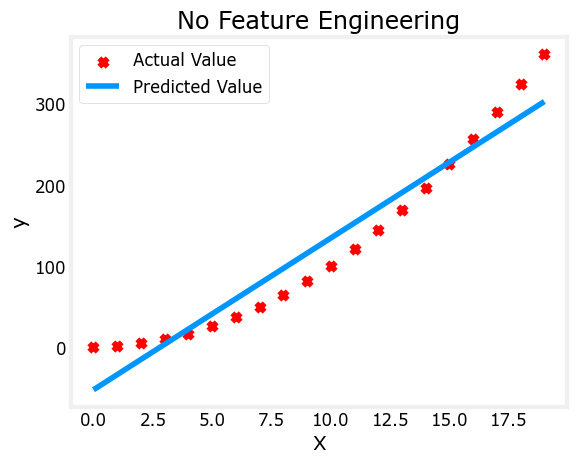

In [17]:
x = np.arange(0, 20, 1)
print(f'x: {x}')
y = 1 + x**2
print(f'y: {y}')
x = x.reshape(-1, 1)

plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('No Feature Engineering')

model_w, model_b = run_gradient_descent_feng(x, y, iterations=1000, alpha=1e-2)
plt.plot(x,x@model_w + model_b, label="Predicted Value")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

x: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y: [  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
Iteration         0, Cost: 7.32922e+03
Iteration      1000, Cost: 2.24844e-01
Iteration      2000, Cost: 2.22795e-01
Iteration      3000, Cost: 2.20764e-01
Iteration      4000, Cost: 2.18752e-01
Iteration      5000, Cost: 2.16758e-01
Iteration      6000, Cost: 2.14782e-01
Iteration      7000, Cost: 2.12824e-01
Iteration      8000, Cost: 2.10884e-01
Iteration      9000, Cost: 2.08962e-01
w,b found by gradient descent: w: [1.], b: 0.0490


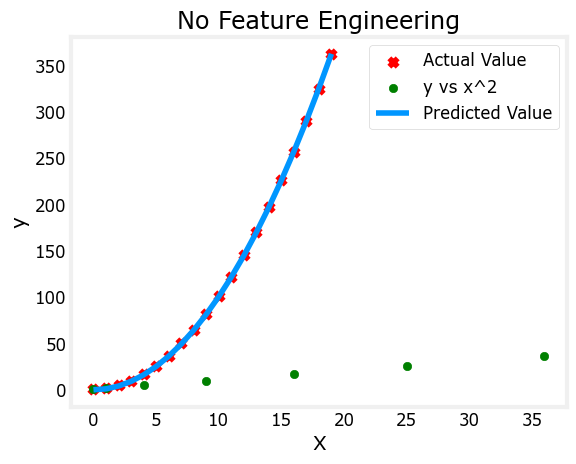

In [32]:
x = np.arange(0, 20, 1)
print(f'x: {x}')
y = 1 + x**2
print(f'y: {y}')
x_engineer = x**2
x_engineer = x_engineer.reshape(-1, 1)

plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('No Feature Engineering')

plt.scatter(x_engineer[0:7], y[0:7], marker='o', c='green', label='y vs x^2')

model_w, model_b = run_gradient_descent_feng(x_engineer, y, iterations=10000, alpha=1e-5)
plt.plot(x, np.dot(x_engineer, model_w) + model_b, label="Predicted Value")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

Iteration         0, Cost: 1.16186e+03
Iteration      1500, Cost: 3.15842e+02
Iteration      3000, Cost: 2.49102e+02
Iteration      4500, Cost: 1.96469e+02
Iteration      6000, Cost: 1.54959e+02
Iteration      7500, Cost: 1.22223e+02
Iteration      9000, Cost: 9.64059e+01
Iteration     10500, Cost: 7.60453e+01
Iteration     12000, Cost: 5.99880e+01
Iteration     13500, Cost: 4.73245e+01
w,b found by gradient descent: w: [0.11 0.69 0.02], b: 0.0141


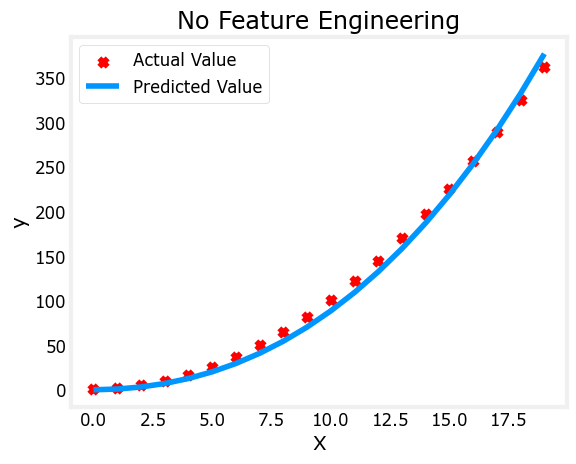

In [36]:
x = np.arange(0, 20, 1)
y = x**2 + 1

x_engineer = np.c_[x, x**2, x**3]


plt.scatter(x, y, marker='x', c='r', label='Actual Value')
plt.title('No Feature Engineering')

model_w, model_b = run_gradient_descent_feng(x_engineer, y, iterations=15000, alpha=1e-7)
plt.plot(x, np.dot(x_engineer, model_w) + model_b, label="Predicted Value")

plt.xlabel("X")
plt.ylabel("y")

plt.legend()
plt.show()

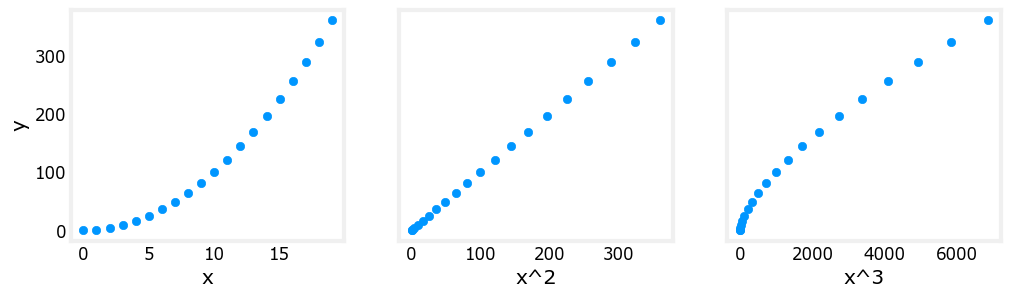

In [37]:
# create target data
x = np.arange(0, 20, 1)
y = x**2

# engineer features .
X = np.c_[x, x**2, x**3]   #<-- added engineered feature
X_features = ['x','x^2','x^3']

fig,ax=plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[:,i],y)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

In [41]:
x = np.arange(0, 20, 1)
x_engineer = np.c_[x, x**2, x**3]

print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_engineer,axis=0)}")

x_engineer_norm = zscore_normalize_features(x_engineer)
print(f"Peak to Peak range by column in norm        X:{np.ptp(x_engineer_norm,axis=0)}")

Peak to Peak range by column in Raw        X:[  19  361 6859]
Peak to Peak range by column in norm        X:[3.3  3.18 3.28]


Iteration         0, Cost: 9.42147e+03
Iteration      1000, Cost: 4.21521e+00
Iteration      2000, Cost: 3.23649e+00
Iteration      3000, Cost: 2.48501e+00
Iteration      4000, Cost: 1.90802e+00
Iteration      5000, Cost: 1.46500e+00
Iteration      6000, Cost: 1.12484e+00
Iteration      7000, Cost: 8.63665e-01
Iteration      8000, Cost: 6.63131e-01
Iteration      9000, Cost: 5.09160e-01
w,b found by gradient descent: w: [ 7.67 93.95 12.29], b: 123.5000


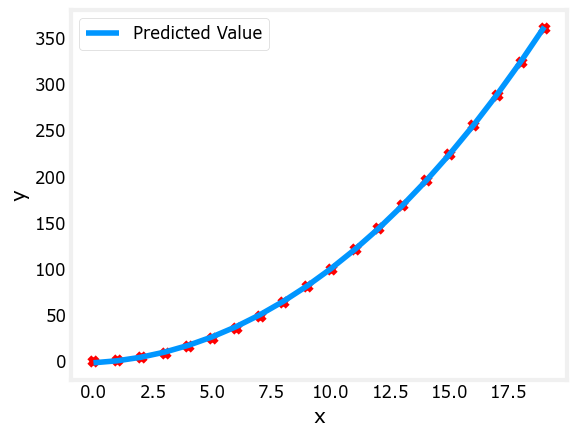

In [50]:
plt.scatter(x, y, marker='x', c='red')
model_w, model_b = run_gradient_descent_feng(x_engineer_norm, y, iterations=10000, alpha=1e-1)
plt.plot(x,x_engineer_norm@model_w + model_b, label="Predicted Value")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Iteration         0, Cost: 2.24887e-01
Iteration    100000, Cost: 2.31061e-02
Iteration    200000, Cost: 1.83619e-02
Iteration    300000, Cost: 1.47950e-02
Iteration    400000, Cost: 1.21114e-02
Iteration    500000, Cost: 1.00914e-02
Iteration    600000, Cost: 8.57025e-03
Iteration    700000, Cost: 7.42385e-03
Iteration    800000, Cost: 6.55908e-03
Iteration    900000, Cost: 5.90594e-03
w,b found by gradient descent: w: [-1.61e+00 -1.01e+01  3.00e+01 -6.92e-01 -2.37e+01 -1.51e+01  2.09e+01
 -2.29e-03 -4.69e-03  5.51e-02  1.07e-01 -2.53e-02  6.49e-02], b: -0.0073


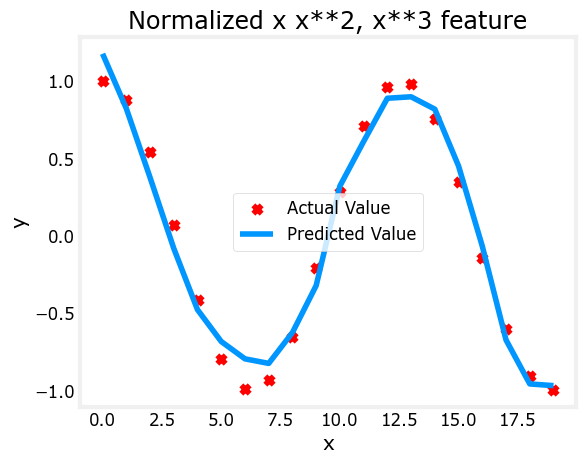

In [51]:
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3,x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = zscore_normalize_features(X) 

model_w,model_b = run_gradient_descent_feng(X, y, iterations=1000000, alpha = 1e-1)

plt.scatter(x, y, marker='x', c='r', label="Actual Value"); plt.title("Normalized x x**2, x**3 feature")
plt.plot(x,X@model_w + model_b, label="Predicted Value"); plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.show()